<a href="https://colab.research.google.com/github/sunjinnn/Blockchain2025/blob/main/25_11_04_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 이미지 분서 기초 (과일 분류) 101페이지까지 함

11.4
특성 데이터만 있고 답이 없는 비지도학습을 진행

유닉스 shall 명령어로 이미지를 가져온 후 해당 코드 2줄은 지워도 된다

흰색은 255, 검은색은 0


세로로 더하면 1번 픽셀의 평균값... 10000번 픽셀의 평균값 = 모든 사과의 픽셀의 평균값을 구했으므로 해당 평균값을 통해 사과를 그린다.

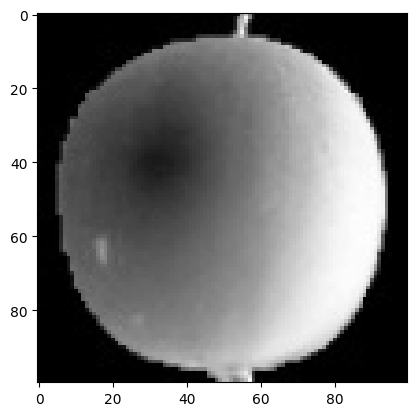

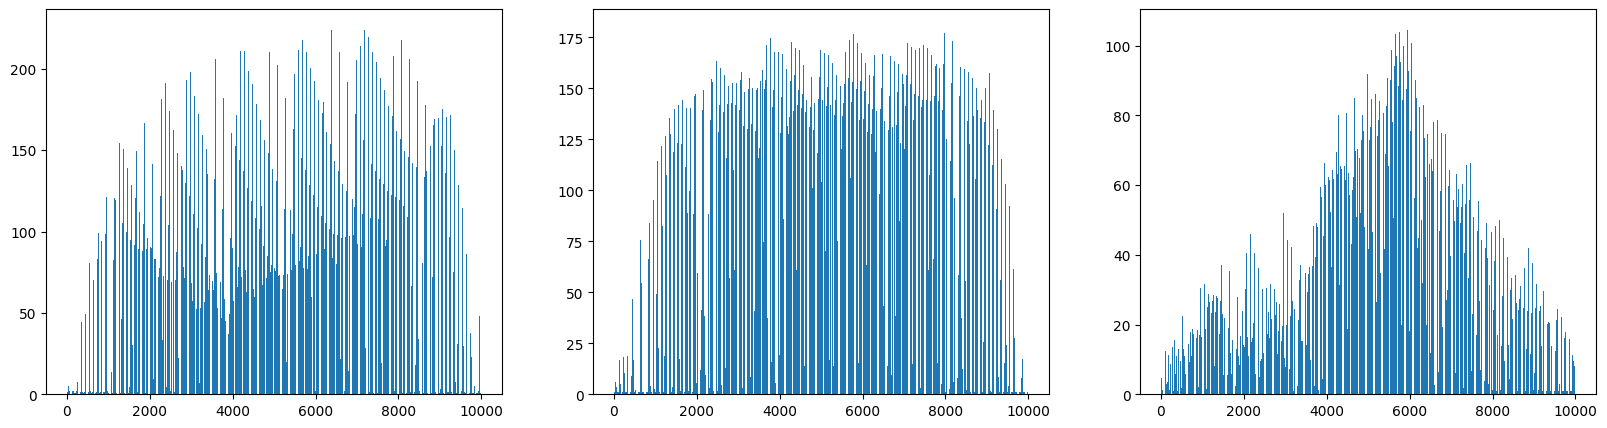

(300, 100, 100)
(300,)
[ 33  48  70  57  87  12  78  59   1  74  86  38  50  92  69  27  68  30
  66  24  76  98  15  84  47  90   3  94  53  23  14  71  32   7  73  36
  55  77  21  10  17  39  99  95  11  35  65   6  61  22  56  89   2  13
  80   0  97   4  58  34  40  43  75  82  54  16  31  49  93  37  63  64
  41  28  67  25  96   8  83  46  19  79  72   5  85  29  20  60  81   9
  45  51  88  62  91  26  52  18  44  42 110 120 141 112 124 102 109 192
 140 142 183 117 101 128 179 159 184 154 188 139 165 119 158 100 111 191
 107 137 182 175 129 148 155 103 157 181 193 121 177 186 106 174 127 164
 156 185 189 133 152 118 169 144 136 104 105 161 149 145 166 160 131 162
 198 150 122 167 138 176 115 147 151 190 135 172 187 180 113 125 130 163
 178 134 170 195 199 116 197 123 143 173 196 194 108 114 171 168 126 146
 132 153 214 237 204 275 206 273 231 242 251 278 289 292 284 223 246 257
 260 232 259 291 226 236 234 227 222 285 230 279 212 274 221 224 213 228
 297 205 218 245 216 217 262

In [7]:
# !wget https://bit.ly/fruits_300_data -O fruits_300.npy
# !ls -al

import numpy as np
fruits = np.load('fruits_300.npy')
# print(fruits.shape)

import matplotlib.pyplot as plt
plt.imshow(fruits[0], cmap='gray') #300장 중에 1번 째 장을 찍어라의 의미의 [0]
plt.show()

# print(fruits[0,20,:]) #:은 0~100


#인공지능은 사과인지 바나나인지 모르고 픽셀 값만 가지고 있기 때문에 들어온 데이터의 특징을 분
apple = fruits[0:100].reshape(-1, 100*100) #3장 있는 것을 한장으로 연결
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)

# print(apple.shape)
# print(apple.mean(axis=1)) #사과의 100개의 첫 번째 평균값?

# plt.hist(apple.mean(axis=1), alpha=0.8)
# plt.hist(pineapple.mean(axis=1), alpha=0.8)
# plt.hist(banana.mean(axis=1), alpha=0.8)
# plt.legend(['apple', 'pineapple', 'banana'])
# plt.show()


#데이터 분석(픽셀별 평균 계산 코드)
fig, axs = plt.subplots(1, 3, figsize=(20,5))

axs[0].bar(range(10000), apple.mean(axis=0))
axs[1].bar(range(10000), pineapple.mean(axis=0))
axs[2].bar(range(10000), banana.mean(axis=0))

plt.show()

#픽셀별 평균으로 대표값을 구하고 비슷한 이미지끼리 군집화
apple_mean = apple.mean(axis=0).reshape(100,100)
pineapple_mean = pineapple.mean(axis=0).reshape(100,100)
banana_mean = banana.mean(axis=0).reshape(100,100)

abs_diff = np.abs(fruits - apple_mean)
abs_mean = np.mean(abs_diff, axis=(1,2))
print(abs_diff.shape)
print(abs_mean.shape)

apple_index = np.argsort(abs_mean)
print(apple_index)